<a href="https://colab.research.google.com/github/m1d0e1/LungCancer/blob/main/LungCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nancyalaswad90/lung-cancer")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/nancyalaswad90/lung-cancer/versions/6


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv(path + "/survey lung cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [53]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [54]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

33


In [55]:
df.isna().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [58]:
#convert all to numerical
if df['SMOKING'].isin([2]).any():
  df = df.replace({1:0, 2:1})
df_num = pd.get_dummies(df, columns=['GENDER', 'LUNG_CANCER'], drop_first=True)
df_num.head()


,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,GENDER_M,LUNG_CANCER_YES
0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,True,True
1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,True,True
2,59,0,0,0,1,0,1,0,1,0,1,1,0,1,False,False
3,63,1,1,1,0,0,0,0,0,1,0,0,1,1,True,False
4,63,0,1,0,0,0,0,0,1,0,1,1,0,0,False,False


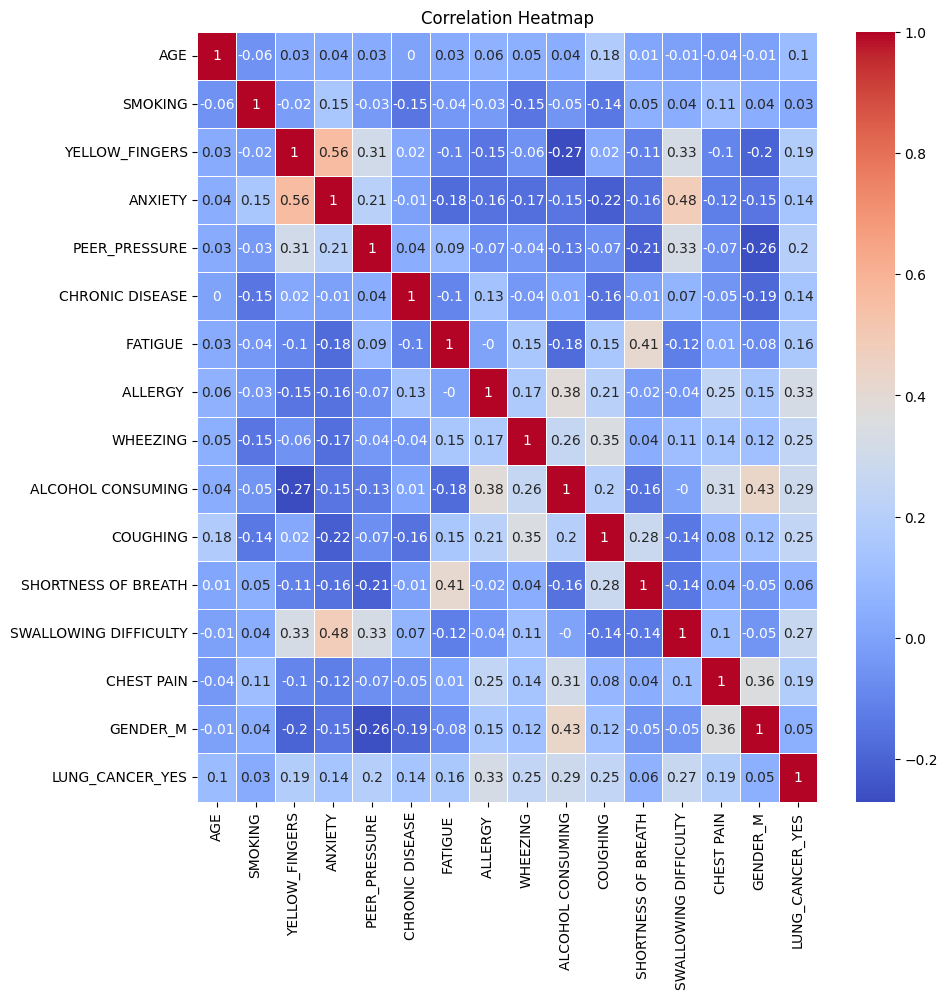

In [59]:
# calculate the correlation
df_corr = df_num.corr(method = 'spearman').round(2)
plt.figure(figsize = (10, 10))
plt.title('Correlation Heatmap')
sns.heatmap(df_corr, cmap = 'coolwarm', annot = True, linewidths=0.5)
plt.show()

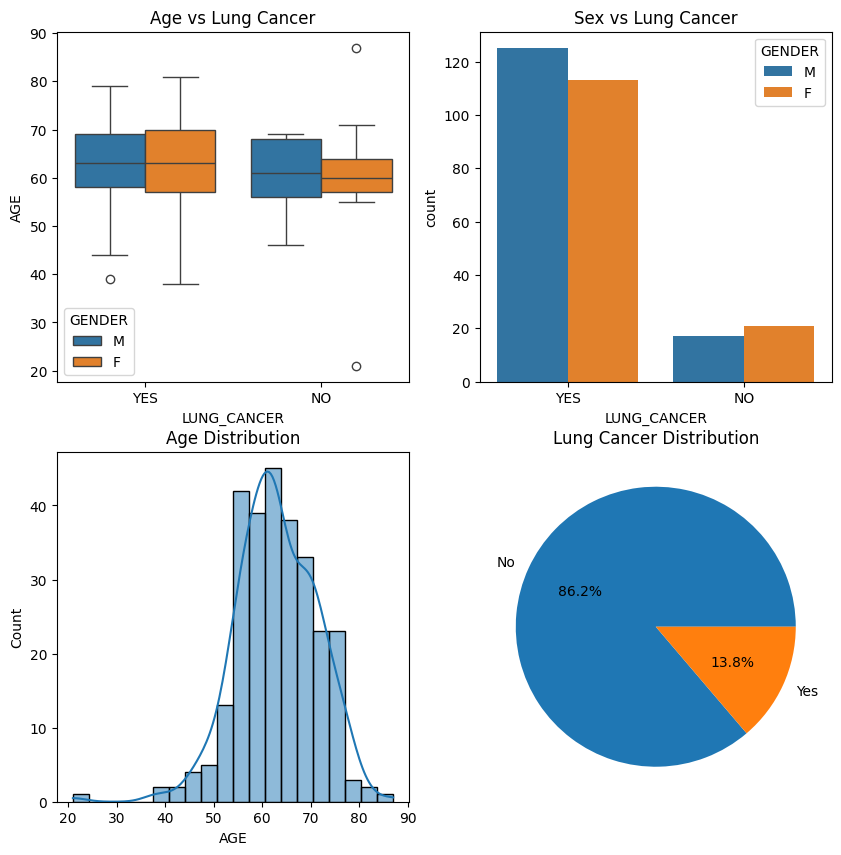

In [60]:
plt.figure(figsize = (10, 10))
plt.subplot(2, 2, 1)
sns.boxplot(y = 'AGE', x = 'LUNG_CANCER', data = df, hue='GENDER')
plt.title('Age vs Lung Cancer')
plt.subplot(2, 2, 2)
sns.countplot(x = 'LUNG_CANCER', data = df, hue='GENDER')
plt.title('Sex vs Lung Cancer')
plt.subplot(2, 2, 3)
sns.histplot(x = 'AGE', data = df, kde=True)
plt.title('Age Distribution')
plt.subplot(2, 2, 4)
plt.pie(df['LUNG_CANCER'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title('Lung Cancer Distribution')
plt.show()

In [65]:
positive = df_num[df_num['LUNG_CANCER_YES'] == 1]
negative = df_num[df_num['LUNG_CANCER_YES'] == 0]

positive['GENDER'] = df.loc[positive.index, 'GENDER']
negative['GENDER'] = df.loc[negative.index, 'GENDER']
positive.head()

<ipython-input-65-ebd0bfac4741>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive['GENDER'] = df.loc[positive.index, 'GENDER']
<ipython-input-65-ebd0bfac4741>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative['GENDER'] = df.loc[negative.index, 'GENDER']


,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,GENDER_M,LUNG_CANCER_YES,GENDER
0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,True,True,M
1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,True,True,M
5,75,0,1,0,0,1,1,1,1,0,1,1,0,0,False,True,F
6,52,1,0,0,0,0,1,0,1,1,1,1,0,1,True,True,M
7,51,1,1,1,1,0,1,1,0,0,0,1,1,0,False,True,F


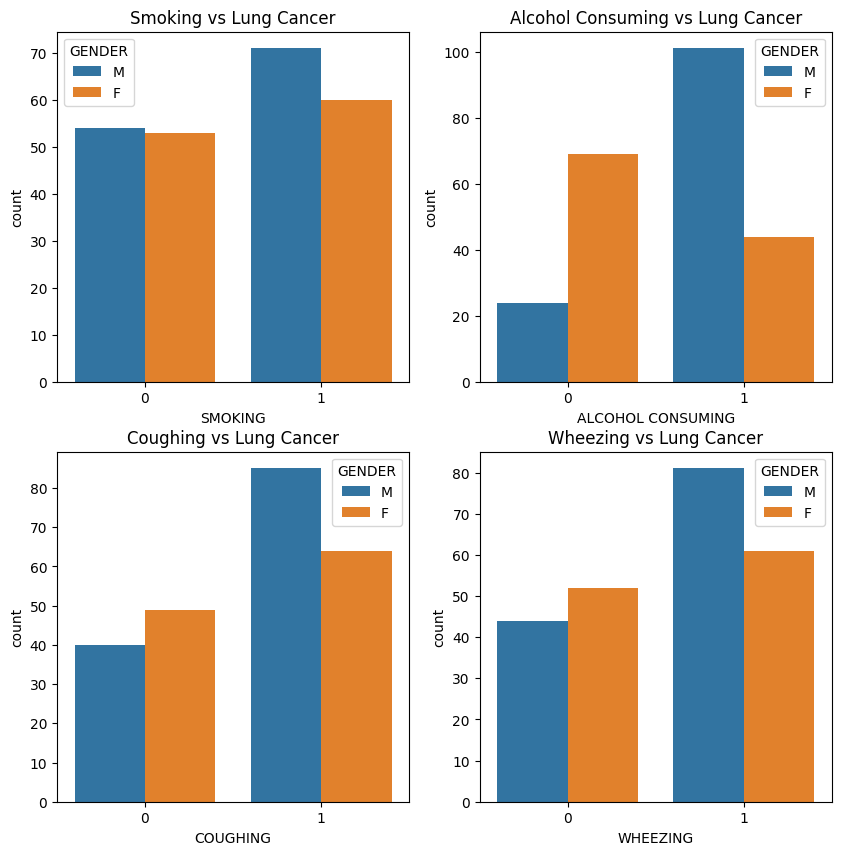

In [70]:
plt.figure(figsize = (10, 10))
plt.subplot(2, 2, 1)
sns.countplot(x = 'SMOKING', data = positive, hue='GENDER')
plt.title('Smoking vs Lung Cancer')
plt.subplot(2, 2, 2)
sns.countplot(x = 'ALCOHOL CONSUMING', data = positive, hue='GENDER')
plt.title('Alcohol Consuming vs Lung Cancer')
plt.subplot(2, 2, 3)
sns.countplot(x = 'COUGHING', data = positive, hue='GENDER')
plt.title('Coughing vs Lung Cancer')
plt.subplot(2, 2, 4)
sns.countplot(x = 'WHEEZING', data = positive, hue='GENDER')
plt.title('Wheezing vs Lung Cancer')
plt.show()

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [83]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred),
    }

# Display results
results_df = pd.DataFrame(results).T
results_df

,MAE,MSE,R2
Linear Regression,0.229077,0.093806,0.442851
Decision Tree,0.107143,0.107143,0.363636
Random Forest,0.146250,0.067184,0.600968
Gradient Boosting,0.178138,0.087556,0.479972


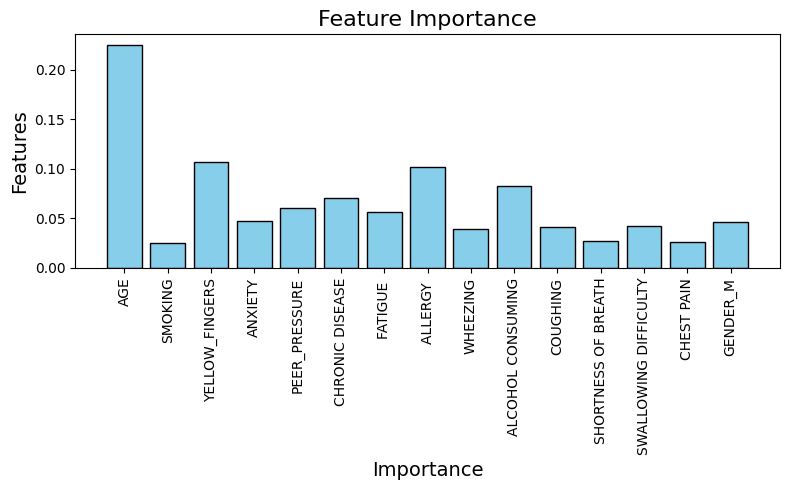

In [88]:
chosed_model = RandomForestRegressor(random_state=42)
chosed_model.fit(X_train, y_train)
importances = chosed_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 5))
plt.bar(feature_names, importances, color='skyblue', edgecolor='black')
plt.xticks(rotation=90)
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout()
plt.show()